In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy import stats

#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import functions as f
# import wrangle 

# Wrangle
- Acquired data
- Prepared data
    - Change column names to remove spaces
    - Converted total and free sulfur dioxide from mg/L to g/L to match the rest of the data measurements
    - Created dummy column for wine type
- Created univariate histogram for visual first glance at data
- Split data into **train**, **validate**, **test**

In [2]:
def get_wine():
    '''
    combined csv needs to be name 'combined_wine.csv' in local drive
    returns df
    '''
    df = pd.read_csv('combined_wine.csv')
    
    new_col_name = []
    
    for col in df.columns:
        new_col_name.append(col.lower().replace(' ', '_'))
    
    df.columns = new_col_name
    
    df['total_sulfur_dioxide'] = df.total_sulfur_dioxide / 1000
    df['free_sulfur_dioxide'] = df.free_sulfur_dioxide / 1000
    dummy_df = pd.get_dummies(df['wine_type'], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [3]:
df = get_wine()

In [4]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                0.011                 0.034   0.9978  3.51       0.56   
1                0.025                 0.067   0.9968  3.20       0.68   
2                0.015                 0.054   0.9970  3.26       0.65   
3                0.017                 0.060   0.9980  3.16       0.58   
4                0.011                 0.034   0.9978  3.51       0.56   

   alcohol  quality wine_type  white  
0      9.4        5       red      0  
1      9.8        5       red      0  
2      9.8        5       red      0  
3      9.8        6       red      0  
4      9.4        5       red      0

In [5]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """
    num_missing = df.isnull().sum()
    pct_miss = (num_missing / df.shape[0]) * 100
    cols_missing = pd.DataFrame({
                    'num_rows_missing': num_missing,
                    'percent_rows_missing': pct_miss
                    })
    
    return  cols_missing

In [6]:
def nulls_by_row(df):
    """
    """
    num_missing = df.isnull().sum(axis=1)
    pct_miss = (num_missing / df.shape[1]) * 100
    
    rows_missing = pd.DataFrame({
                    'num_cols_missing': num_missing,
                    'percent_cols_missing': pct_miss
                    })
    
    return rows_missing

In [7]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols

In [8]:
def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [9]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    #distrinution of numerical attributes
    '''
    print(f"""SUMMARY REPORT
=====================================================
          
          
Dataframe head: 
{df.head()}
          
=====================================================
          
          
Dataframe info: """)
    df.info()

    print(f"""=====================================================
          
          
Dataframe Description: 
{df.describe().T}
          
=====================================================


nulls in dataframe by column: 
{nulls_by_col(df)}
=====================================================


nulls in dataframe by row: 
{nulls_by_row(df)}
=====================================================
    
    
DataFrame value counts: 
 """)         
    for col in (get_object_cols(df)): 
        print(f"""******** {col.upper()} - Value Counts:
{df[col].value_counts()}
    _______________________________________""")                   
        
# fig, axes = plt.subplots(1, len(get_numeric_cols(df)), figsize=(15, 5))
    
    for col in get_numeric_cols(df):
        sns.histplot(df[col])
        plt.title(f'Histogram of {col}')
        plt.show()  

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                0.011                 0.034   0.9978  3.51       0.56   
1                0.025                 0.067   0.9968  3.20       0.68   
2                0.015                 0.054   0.9970  3.26       0.65   
3                0.017                 0.060   0.9980  3.16       0.58   
4                0.011                 0.034   0.9978  3.51       0.56   

   alcohol  quality wine_type  w

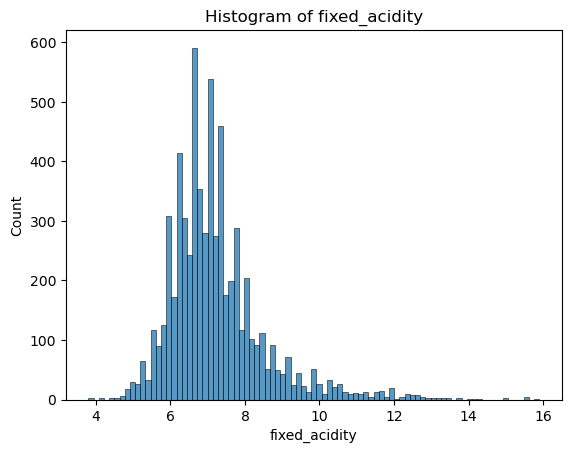

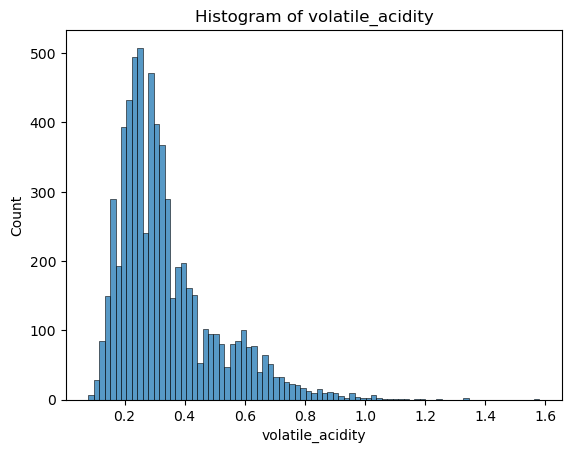

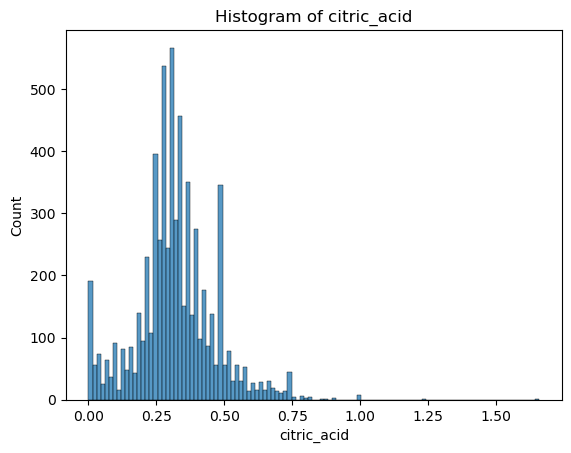

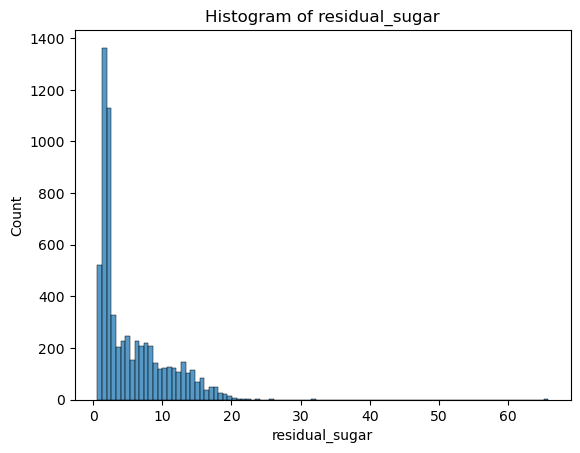

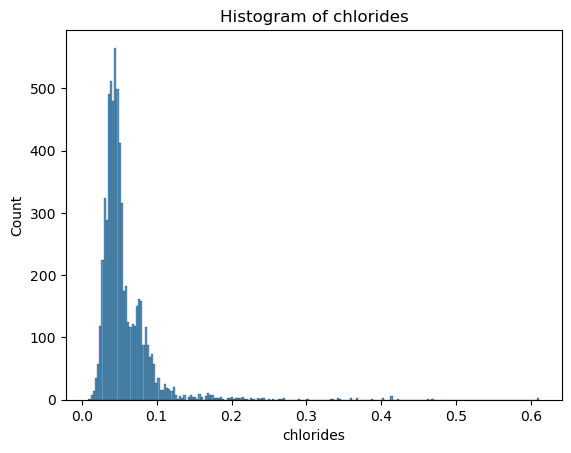

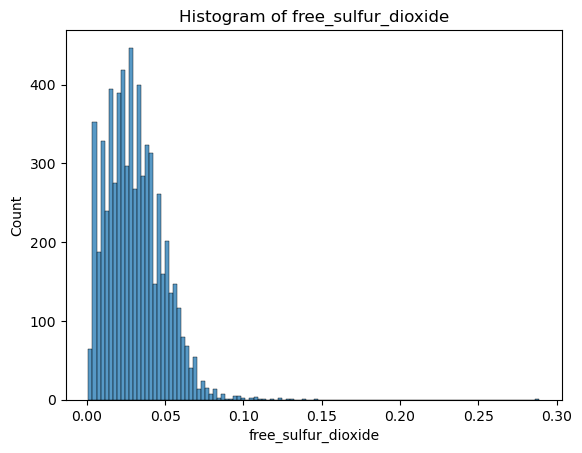

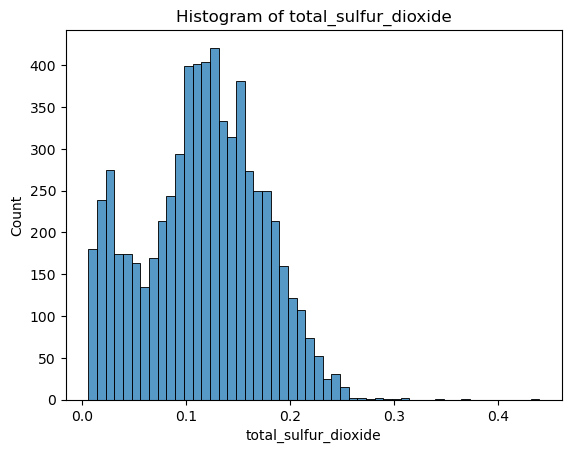

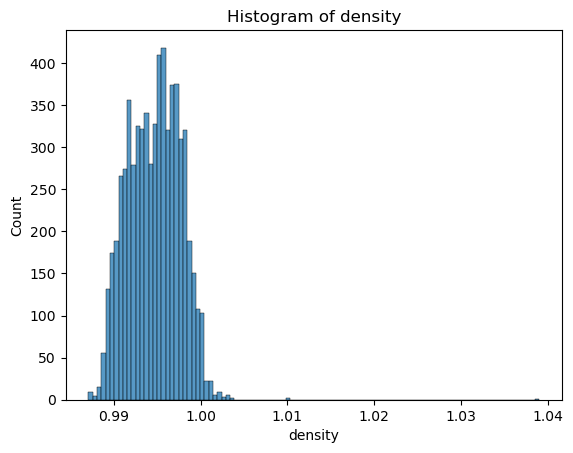

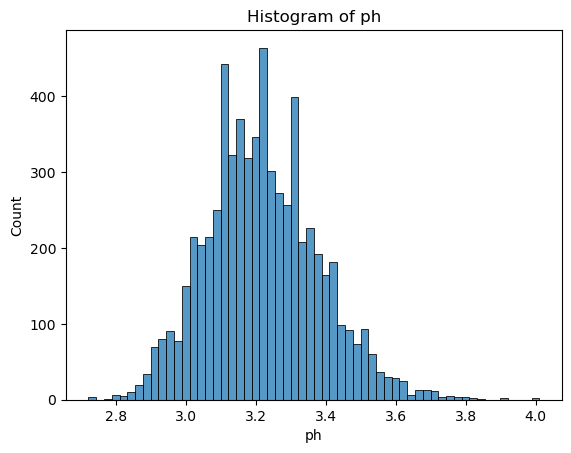

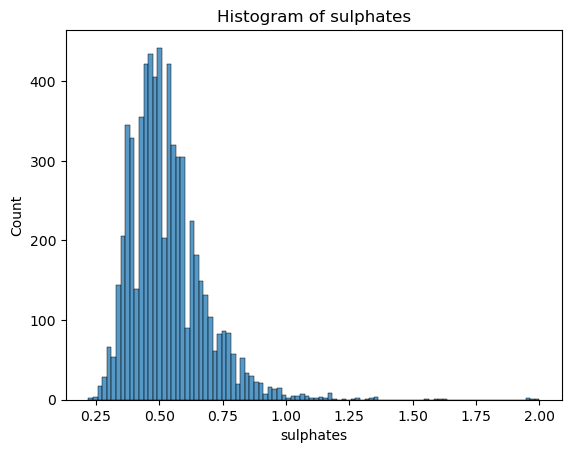

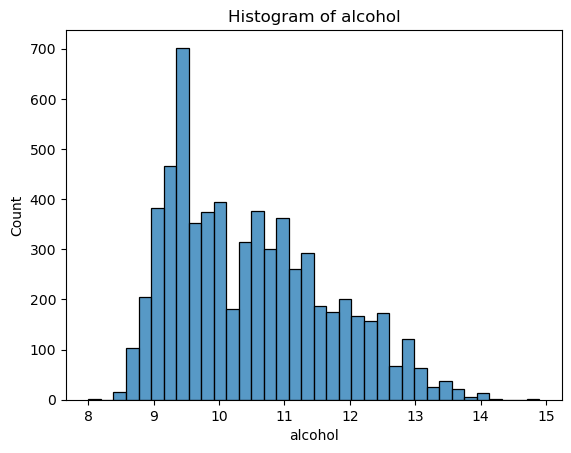

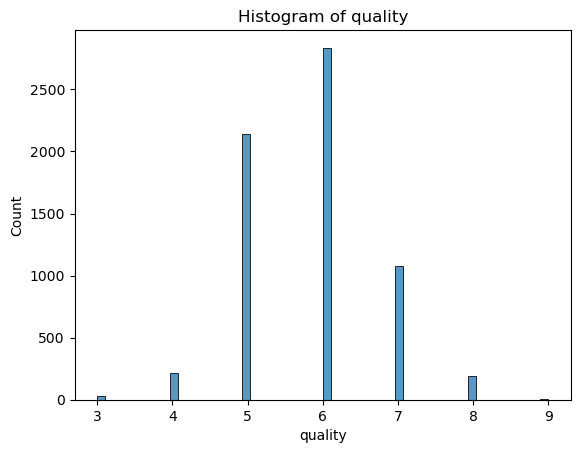

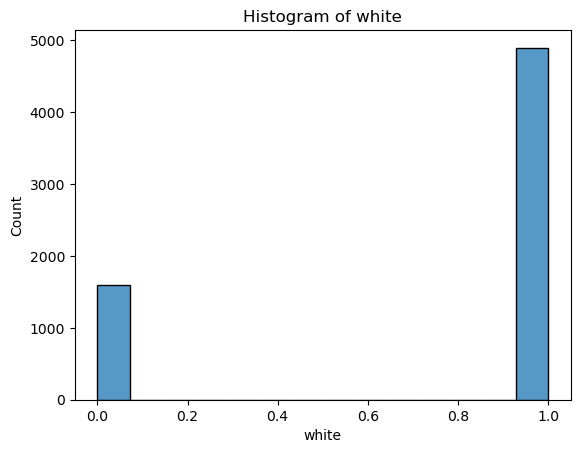

In [10]:
summarize(df)

In [11]:
def split_data(df):
    '''
    Be sure to code it as train, validate, test = split_data(df)
    take in a DataFrame and return train, validate, and test DataFrames; .
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       )
    #This confirms and Validates my split.
    
    print(f'train -> {train.shape}, {round(train.shape[0]*100 / df.shape[0],2)}%')
    print(f'validate -> {validate.shape},{round(validate.shape[0]*100 / df.shape[0],2)}%')
    print(f'test -> {test.shape}, {round(test.shape[0]*100 / df.shape[0],2)}%')
    
    return train, validate, test  

In [12]:
train, validate, test = split_data(df)

train -> (3897, 14), 59.98%
validate -> (1300, 14),20.01%
test -> (1300, 14), 20.01%


In [13]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353            6.4             0.160         0.28             2.2      0.042   
2032            7.2             0.550         0.09             1.5      0.108   
6223            6.4             0.400         0.25             4.2      0.032   
2817            7.2             0.260         0.44             7.1      0.027   
1293            7.5             0.755         0.00             1.9      0.084   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
3353                0.033                 0.093  0.99140  3.31       0.43   
2032                0.016                 0.151  0.99380  3.07       0.57   
6223                0.015                 0.091  0.98988  3.26       0.52   
2817                0.025                 0.126  0.99300  3.02       0.34   
1293                0.006                 0.012  0.99672  3.34       0.49   

      alcohol  quality wine_type  white  
3353     11.1        6     white      1  
2032      9.2        4     white      1  
6223     13.1        6     white      1  
2817     11.1        8     white      1  
1293      9.7        4       red      0

# Explore

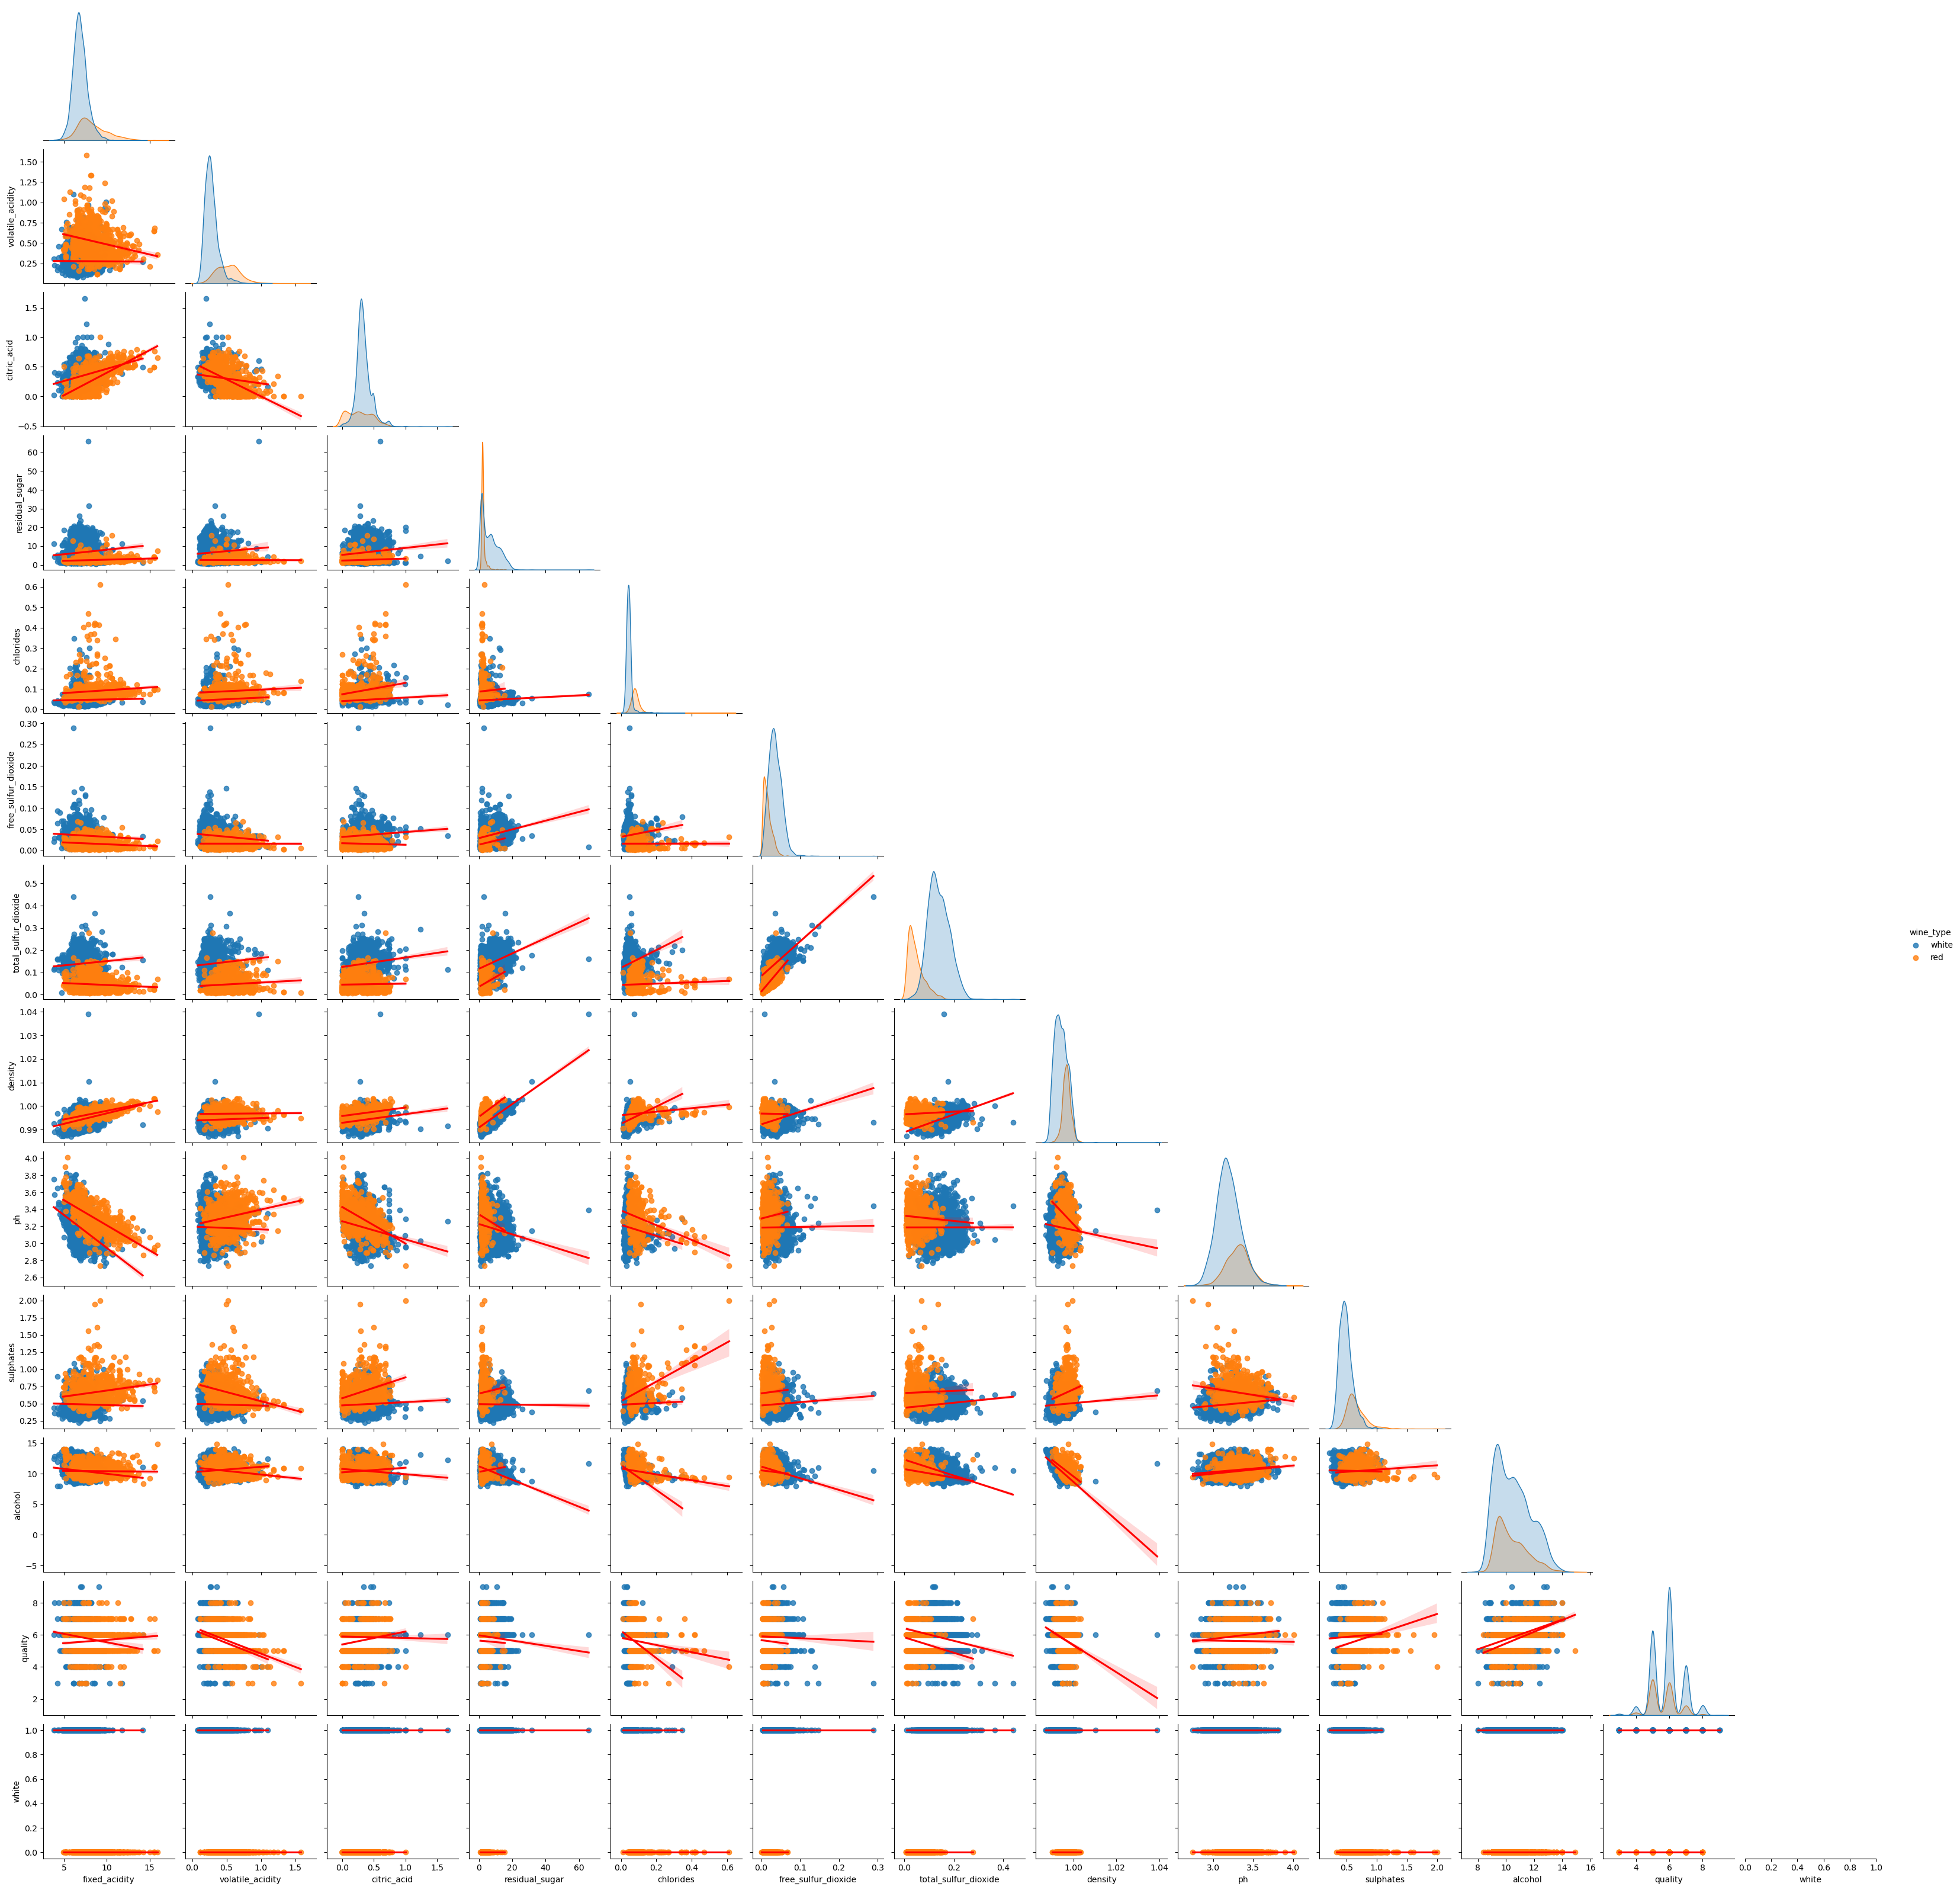

In [14]:
sns.pairplot(data=train, kind='reg', hue="wine_type", plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

# Variable is continuous and Target variable is category

Manny  
Are alcohol and quality correlated?  
Are volitile acidity and quality correlated?  

Scott  
Are sulphate and quality correlated?  
Are citric acid and quality correlated?  

Steps to take:  
Hypothesize  
Visualize  
Stats test  
Summarize  

In [71]:
alpha = 0.05

In [72]:
overall_mean = train.quality.mean()
overall_mean

5.812933025404157

## Quality (Categorical) vs. Alcohol percentage (Continuous)

𝐻0  : there is not a relationship between wine quality and alcohol content

𝐻𝑎  : there is a relationship between wine quality and alcohol content

In [14]:
def get_alcohol_quality(train):
    '''
    Input:
    train df
    Output:
    boxplot of quality and alcohol
    '''
    plt.figure(figsize=(12,6))
    sns.boxplot(data=train, x='quality', y='alcohol', palette='Set1')
    plt.title('Wine by Quality and Alcohol')
    plt.ylabel('Alcohol Vol %')
    plt.xlabel('Quality Rating')
    plt.show()

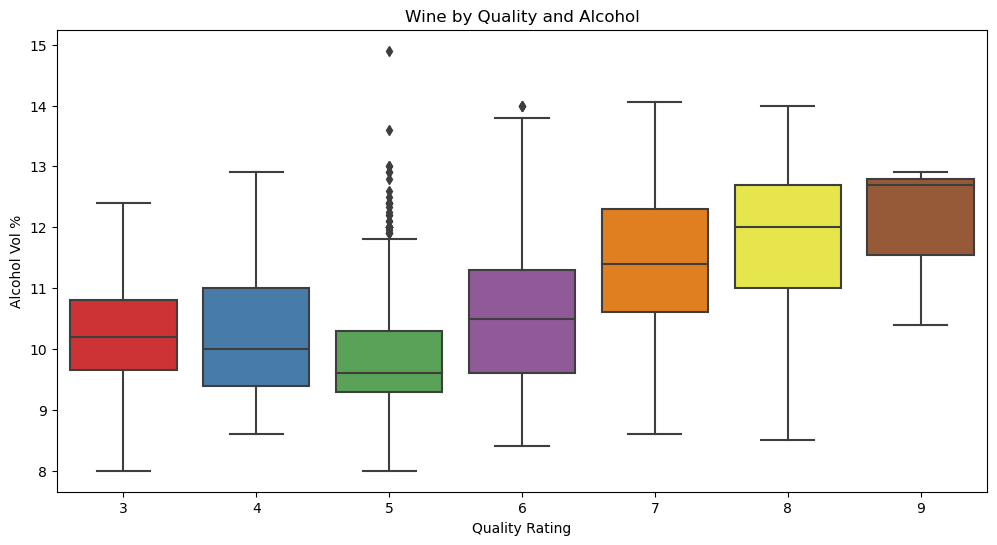

In [15]:
get_alcohol_quality(train)

Chart observation:  
- As alcohol content increases, the wine quality rating tends to increase as well.
- Conversely, as alcohol content decreases, the wine quality rating tends to decrease.

In [75]:
# stats test
t, p = stats.ttest_1samp(train.alcohol, overall_mean)
t, p

(244.18416988441462, 0.0)

In [76]:
# p-value print statement
if p < alpha:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


#### Final Takeaway:
Based on the result of our test, we can infer that alcohol content impacts wine quality. As alcohol content increases or decreases, wine quality rating increases and decreases respectively.

## Quality (Categorical) vs. Volatile Acidity(Continuous)

$H_0$ : there is not a relationship between wine quality and volatile acidity

$H_a$ : there is a relationship between wine quality and volatile acidity

In [16]:
def get_va_quality(train):
    '''
    Input:
    train df
    Output:
    boxplot of quality and volatile acidity
    '''
    plt.figure(figsize=(12,6))
    sns.boxplot(data=train, x='quality', y='volatile_acidity', palette='Set1')
    plt.title('Wine by Quality and Volatile Acidity')
    plt.ylabel('Volatile Acidity (g/L)')
    plt.xlabel('Quality Rating')
    plt.show()

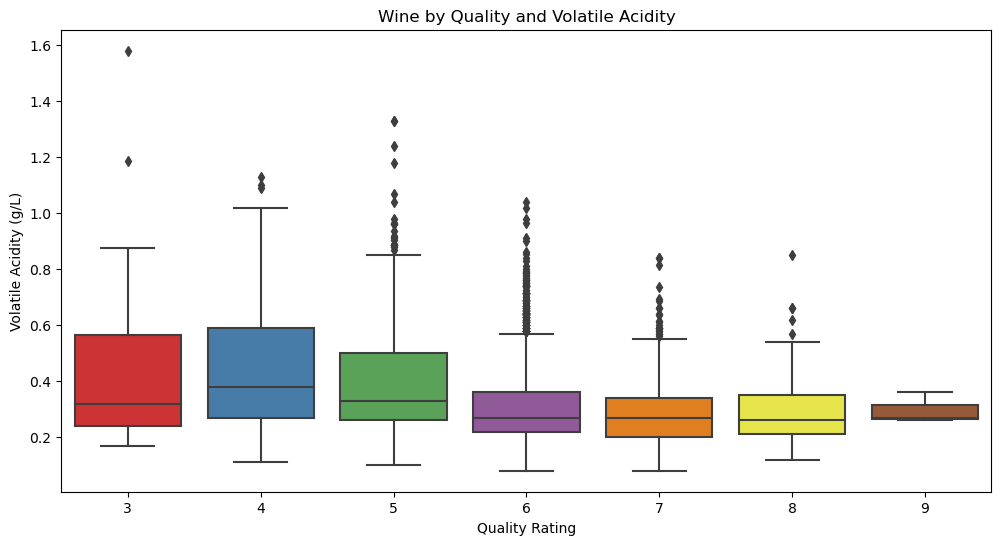

In [17]:
get_va_quality(train)

Chart observation:
- Higher fluctuating or spread of volatile acidity results in a lower wine quality grade.
- Conversely, lower fluctuating or spread of volatile acidity results in a higher wine quality grade.

In [79]:
# stats test
t, p = stats.ttest_1samp(train.volatile_acidity, overall_mean)
t, p

(-2081.429534846605, 0.0)

In [80]:
# p-value print statement
if p < alpha:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypthesis')

we can reject the null hypothesis


#### Takeaway:
Based on the results of our test, we can infer that volatile acidity impacts wine quality. The more that volatile acidity fluctuates the lower quality grade a wine receives and the less volatile acidity fluctuates the higher quality grade a wine receives.

## Quality (Categorical) vs. Sulphate (Continuous)

In [18]:
def get_sulphate_quality(train):
    '''
    Input:
    train df
    Output:
    stripplot of quality and sulphate
    '''
    plt.figure(figsize=(12,6))
    sns.stripplot(data=train, x='quality', y='sulphates')
    plt.title('Wine by Quality and Sulphates')
    plt.ylabel('Sulphates (g/L)')
    plt.xlabel('Quality Rating')
    plt.show()

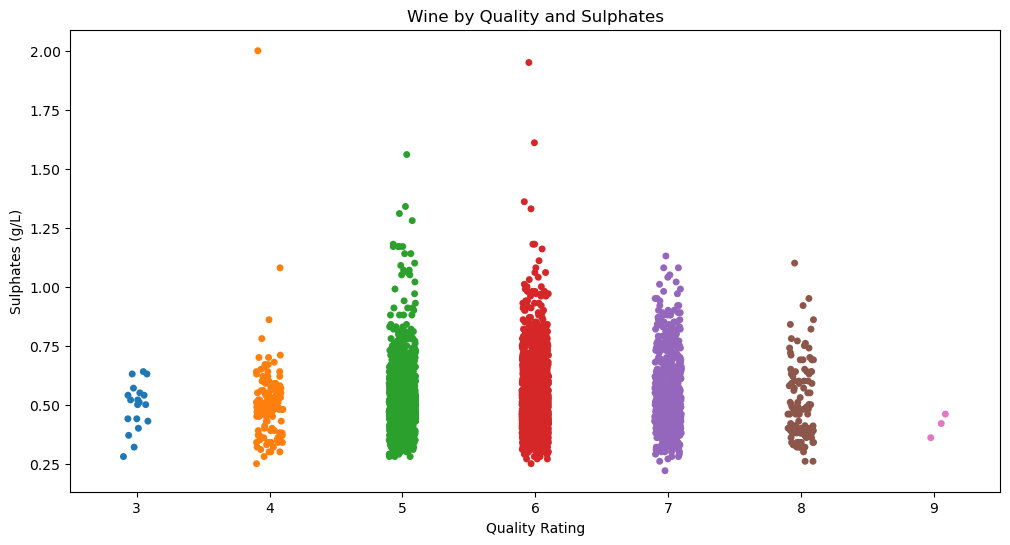

In [19]:
get_sulphate_quality(train)

Chart Observation:

#### Final Takeaway:

## Quality (Categorical) vs. Citric Acid (Continuous)

In [20]:
def get_ca_quality(train):
    '''
    Input:
    train df
    Output:
    barplot of quality and citric acid
    '''
    plt.figure(figsize=(12,6))
    sns.barplot(data=train, x='quality', y='citric_acid', palette='Set1')
    plt.title('Wine by Quality and Citric Acid')
    plt.ylabel('Citric Acid (g/L)')
    plt.xlabel('Quality Rating')
    plt.show()

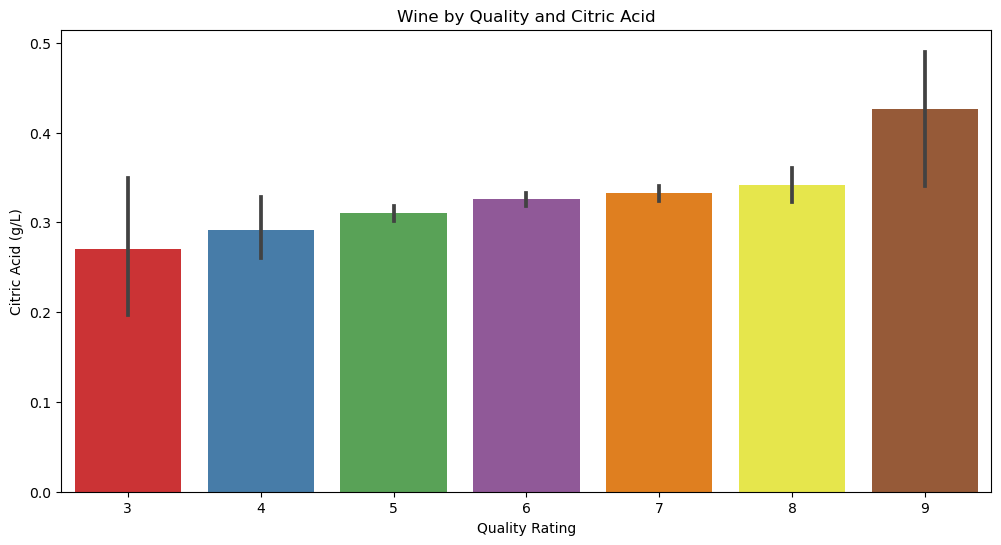

In [21]:
get_ca_quality(train)

Chart observation:
- As citric acid increases, the wine quality rating tends to increase as well.
- Conversely, as citric acid decreases, the wine quality rating tends to decrease.

#### Takeaway:
Based on our test result, we can infer that citric acid impacts wine quality rating. As citric acid gradually increases, wine quality rating also increases.

In [22]:
columns = ['alcohol', 'volatile_acidity',
           'sulphates','citric_acid','free_sulfur_dioxide',
           'ph','fixed_acidity','residual_sugar','white','chlorides','density']

In [23]:
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = f.scale_data(train, validate, test, columns)

In [28]:
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353       0.214876          0.053333     0.168675        0.024540   0.050167   
2032       0.280992          0.313333     0.054217        0.013804   0.160535   
6223       0.214876          0.213333     0.150602        0.055215   0.033445   
2817       0.280992          0.120000     0.265060        0.099693   0.025084   
1293       0.305785          0.450000     0.000000        0.019939   0.120401   

      free_sulfur_dioxide   density        ph  sulphates   alcohol  white  \
3353             0.111111  0.082707  0.448819   0.117978  0.449275    1.0   
2032             0.052083  0.128976  0.259843   0.196629  0.173913    1.0   
6223             0.048611  0.053403  0.409449   0.168539  0.739130    1.0   
2817             0.083333  0.113553  0.220472   0.067416  0.449275    1.0   
1293             0.017361  0.185271  0.472441   0.151685  0.246377    0.0   

        cluster  
3353  cluster_2  
2032  cluster_0  
6223  cluster_1  
2817  cluster_2  
1293  cluster_0

<Figure size 1400x900 with 0 Axes>

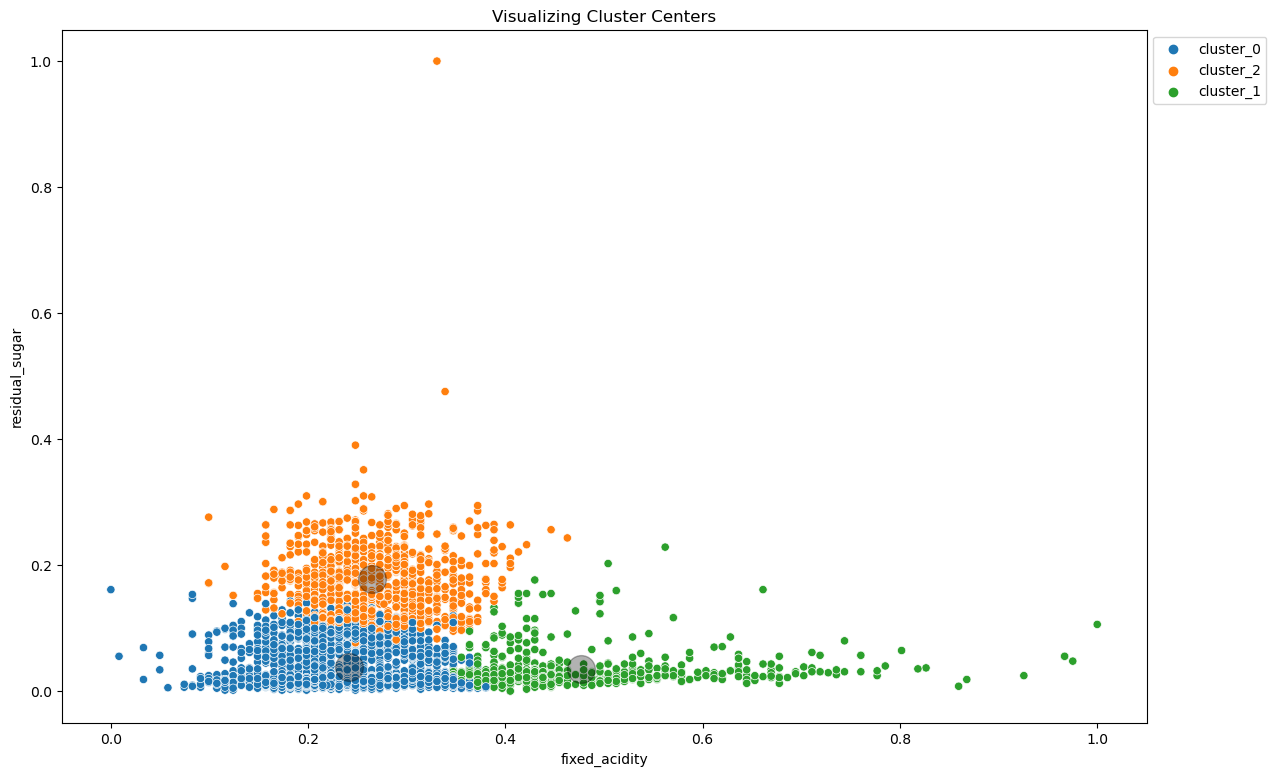

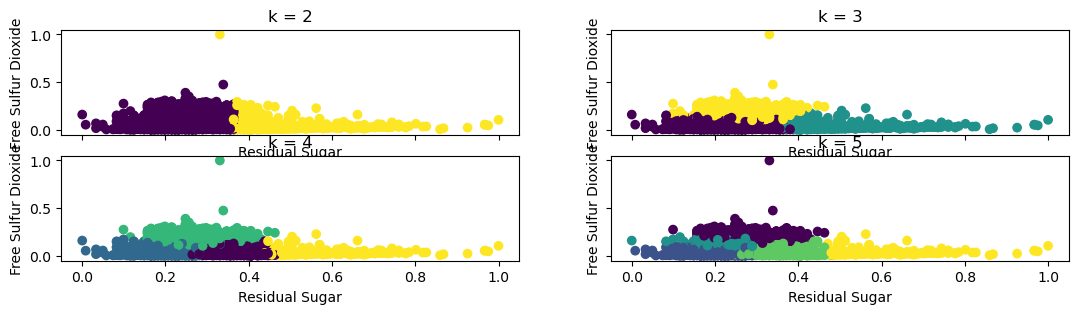

In [35]:
new_train = get_lit(X_train_scaled, 'fixed_acidity', 'residual_sugar', 'density')

<Figure size 1400x900 with 0 Axes>

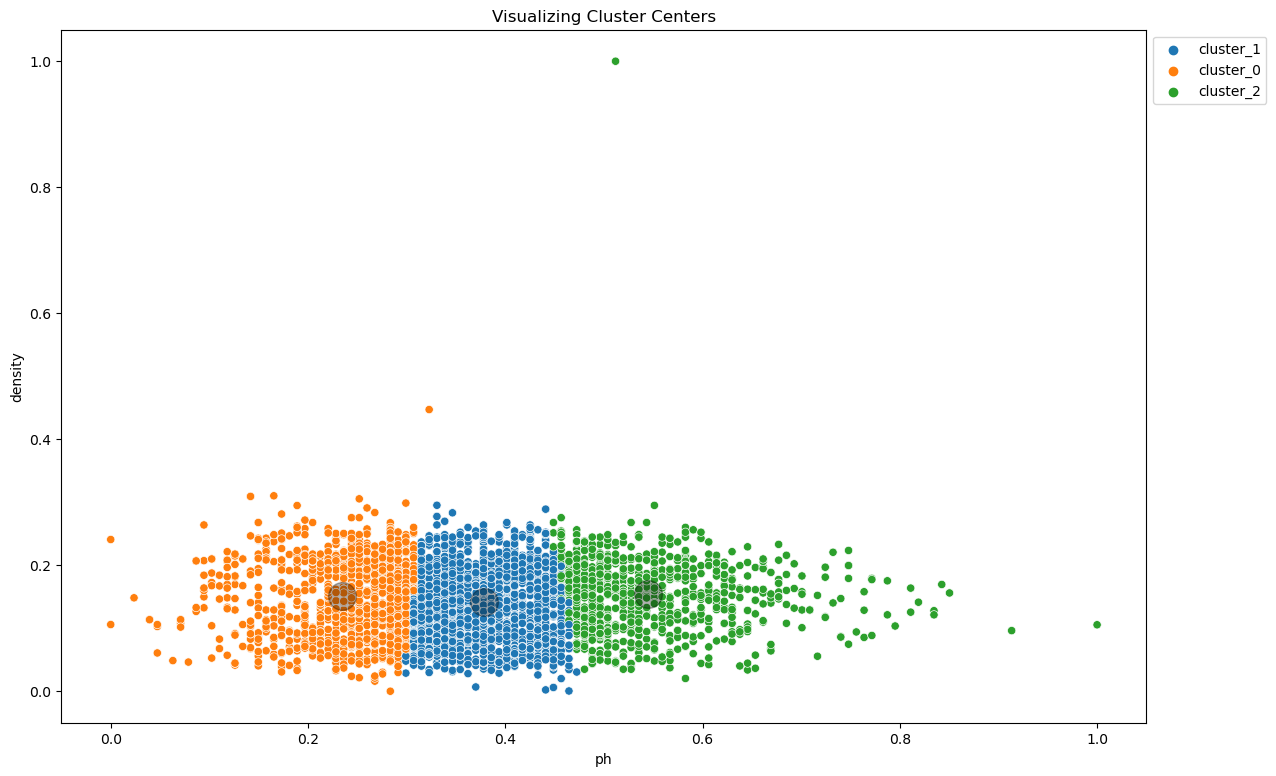

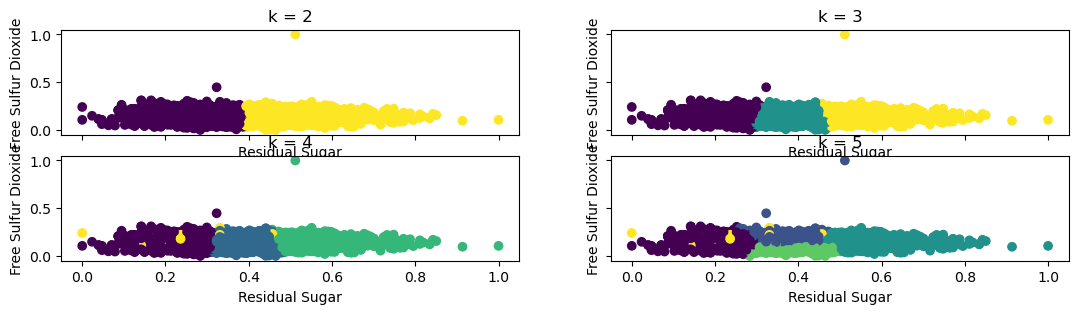

In [40]:
new_train = get_lit(X_train_scaled, 'ph', 'density', 'chlorides')

<Figure size 1400x900 with 0 Axes>

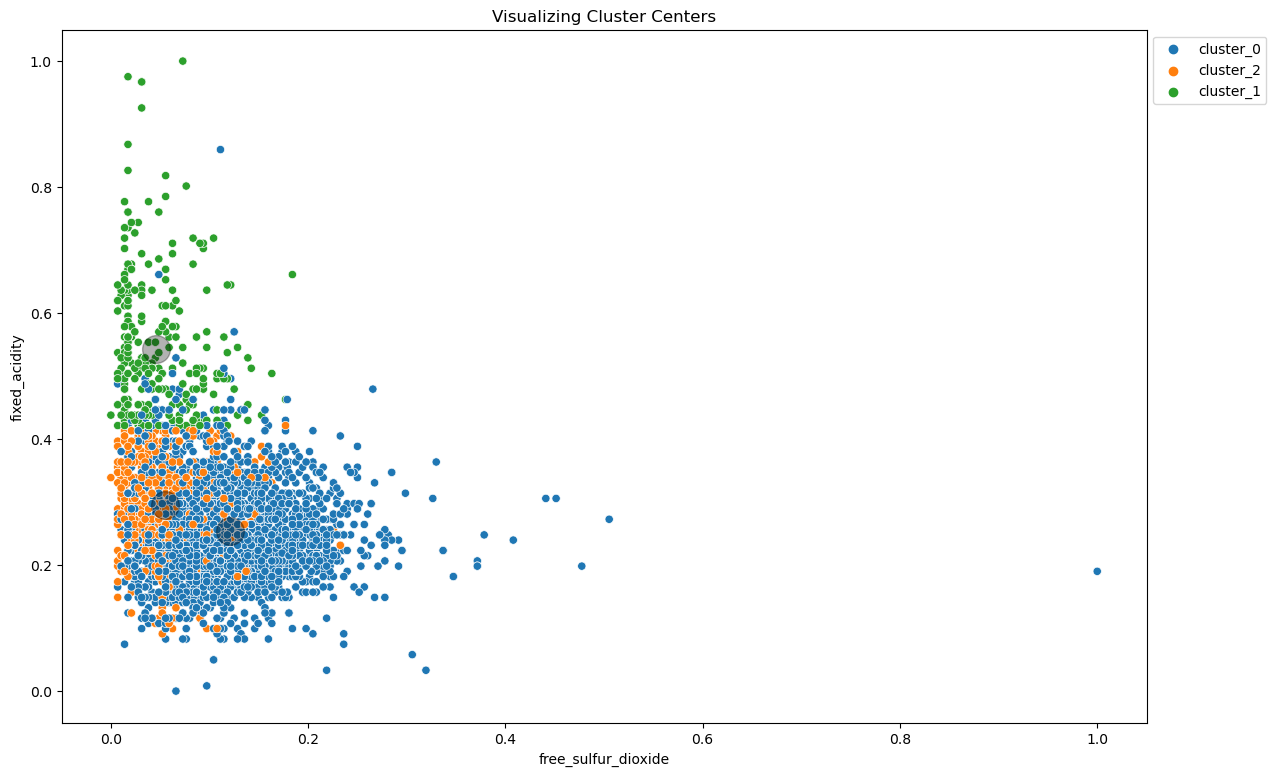

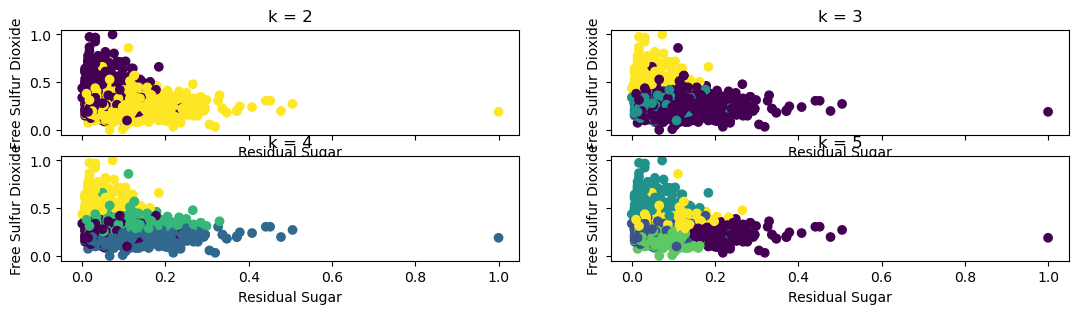

In [42]:
new_train = get_lit(X_train_scaled, 'free_sulfur_dioxide', 'fixed_acidity', 'white')

In [122]:
X = train[['residual_sugar', 'free_sulfur_dioxide', 'ph']]
X.head()

residual_sugar  free_sulfur_dioxide    ph
3353             2.2                0.033  3.31
2032             1.5                0.016  3.07
6223             4.2                0.015  3.26
2817             7.1                0.025  3.02
1293             1.9                0.006  3.34

In [117]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X)

# USE the thing
kmeans.predict(X)

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

In [123]:
train['cluster'] = kmeans.predict(X)

In [124]:
X['cluster'] = kmeans.predict(X)

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_57377/2739994605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


In [119]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353            6.4              0.16         0.28             2.2      0.042   
2032            7.2              0.55         0.09             1.5      0.108   
6223            6.4              0.40         0.25             4.2      0.032   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
3353                0.033                 0.093  0.99140  3.31       0.43   
2032                0.016                 0.151  0.99380  3.07       0.57   
6223                0.015                 0.091  0.98988  3.26       0.52   

      alcohol  quality wine_type  white  cluster  
3353     11.1        6     white      1        0  
2032      9.2        4     white      1        0  
6223     13.1        6     white      1        0

In [125]:
train.groupby('quality').mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality                                                                 
3             7.700000          0.488421     0.270526        5.447368   
4             7.389256          0.449835     0.291240        4.268595   
5             7.342174          0.390251     0.310062        5.847841   
6             7.205575          0.312887     0.325622        5.656246   
7             7.128175          0.285706     0.332317        4.810159   
8             6.786842          0.293114     0.341053        5.460965   
9             7.700000          0.296667     0.426667        5.666667   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality                                                                   
3         0.068789             0.046763              0.142842  0.995636   
4         0.062992             0.021463              0.103595  0.994892   
5         0.065111             0.030442              0.120560  0.995870   
6         0.054053             0.031565              0.116386  0.994627   
7         0.045203             0.030240              0.107994  0.993154   
8         0.041061             0.033509              0.115816  0.992519   
9         0.028333             0.038667              0.118667  0.992367   

               ph  sulphates    alcohol     white   cluster  
quality                                                      
3        3.251053   0.491053  10.163158  0.736842  0.578947  
4        3.215950   0.511074  10.157851  0.752066  0.561983  
5        3.210571   0.526045   9.842573  0.676947  0.671550  
6        3.218295   0.532055  10.570880  0.776416  0.677175  
7        3.229048   0.547048  11.389180  0.820635  0.557143  
8        3.227368   0.504912  11.669298  0.903509  0.692982  
9        3.283333   0.413333  12.000000  1.000000  0.666667

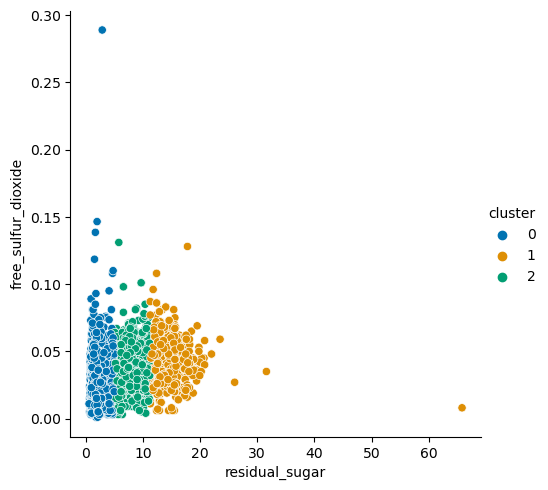

In [126]:
#Plot my predictions
sns.relplot(x='residual_sugar', y='free_sulfur_dioxide', hue='cluster', palette='colorblind', data=train)
plt.show()

In [128]:
kmeans.cluster_centers_

array([[ 2.23184358,  0.02453631,  3.2526214 ],
       [14.57316054,  0.04441221,  3.13145485],
       [ 7.87602881,  0.03742027,  3.18781893]])

In [130]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns[:3])
centroids

residual_sugar  free_sulfur_dioxide        ph
0        2.231844             0.024536  3.252621
1       14.573161             0.044412  3.131455
2        7.876029             0.037420  3.187819

In [131]:
train.groupby('cluster')['residual_sugar', 'free_sulfur_dioxide', 'ph'].mean()

/var/folders/5l/kpcqc8ws4q1c6n6rsks4xbbw0000gn/T/ipykernel_57377/2462817630.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('cluster')['residual_sugar', 'free_sulfur_dioxide', 'ph'].mean()


residual_sugar  free_sulfur_dioxide        ph
cluster                                               
0              2.231844             0.024536  3.252621
1             14.573161             0.044412  3.131455
2              7.876029             0.037420  3.187819

In [132]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

In [133]:
train['cluster'] = 'cluster_' + train.cluster.astype(str)
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353            6.4             0.160         0.28             2.2      0.042   
2032            7.2             0.550         0.09             1.5      0.108   
6223            6.4             0.400         0.25             4.2      0.032   
2817            7.2             0.260         0.44             7.1      0.027   
1293            7.5             0.755         0.00             1.9      0.084   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
3353                0.033                 0.093  0.99140  3.31       0.43   
2032                0.016                 0.151  0.99380  3.07       0.57   
6223                0.015                 0.091  0.98988  3.26       0.52   
2817                0.025                 0.126  0.99300  3.02       0.34   
1293                0.006                 0.012  0.99672  3.34       0.49   

      alcohol  quality wine_type  white    cluster  
3353     11.1        6     white      1  cluster_0  
2032      9.2        4     white      1  cluster_0  
6223     13.1        6     white      1  cluster_0  
2817     11.1        8     white      1  cluster_2  
1293      9.7        4       red      0  cluster_0

In [29]:
def get_lit(train, variable1, variable2, variable3):
    '''
    Inputs:
    df, variable1, variable2, variable3 as strings
    Outputs:
    some shit, hopefully
    '''
    # create x_train
    X = train[[variable1, variable2, variable3]]
    # initiate kmeans
    kmeans = KMeans(3)
    kmeans.fit(X)
    kmeans.predict(X)
    # create new column with cluster
    train['cluster'] = kmeans.predict(X)
    
    kmeans.cluster_centers_
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns[:3])
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    # begin plotting
    plt.figure(figsize=(14,9))
    plt.figure(figsize=(14,9))
    
    sns.scatterplot(x=variable1, y=variable2, data=train, hue='cluster')
    
    centroids.plot.scatter(x=variable1, y=variable2, ax= plt.gca(), color='k', alpha = 0.3, s=400)
    
    plt.title('Visualizing Cluster Centers')
    
    unique_clusters = train['cluster'].unique()
    
    cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
    
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    
    # k means plot
    fig, axs = plt.subplots(2,2, figsize=(13,3), sharex=True, sharey=True)

    for ax, k in zip(axs.ravel(), range(2,6)):
    
        clusters = KMeans(k).fit(X).predict(X)
    
        ax.scatter(X[variable1], X[variable2], c=clusters)
    
        ax.set(title='k = {}'.format(k), xlabel='Residual Sugar', ylabel='Free Sulfur Dioxide')
    
    return train

<Figure size 1400x900 with 0 Axes>

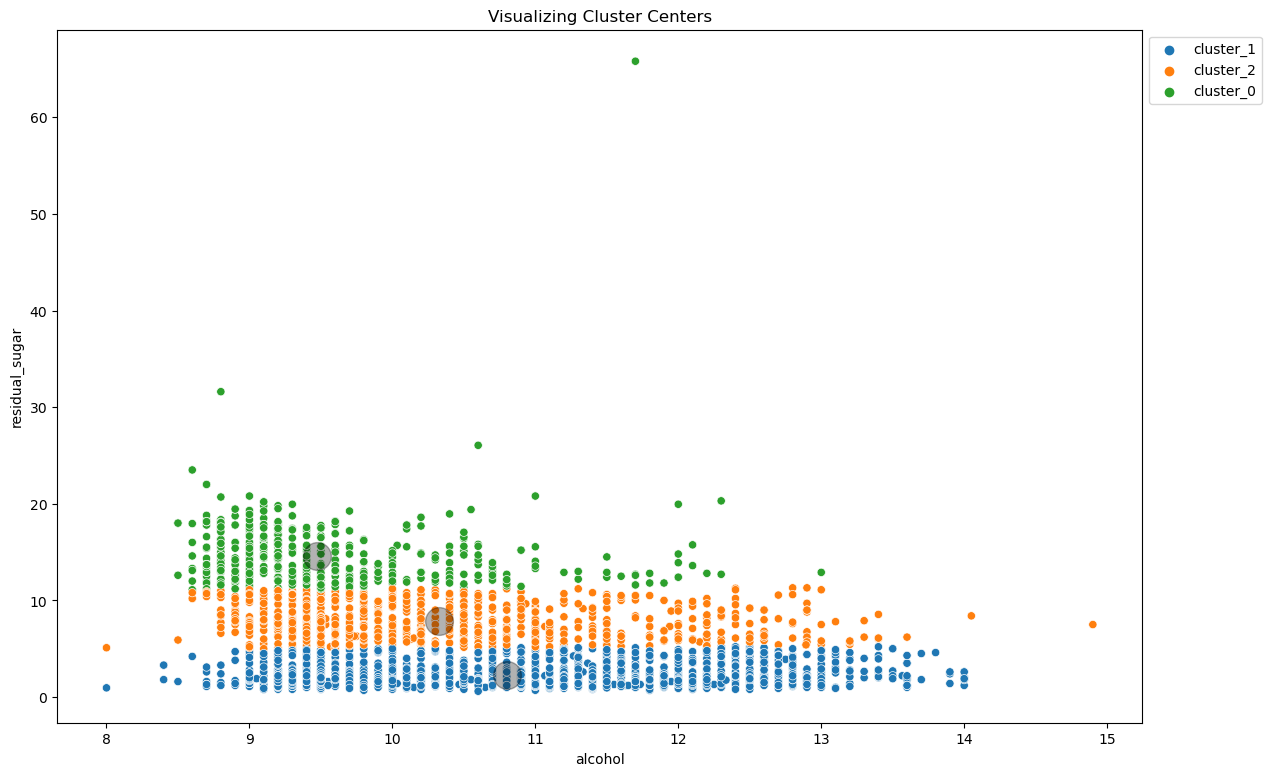

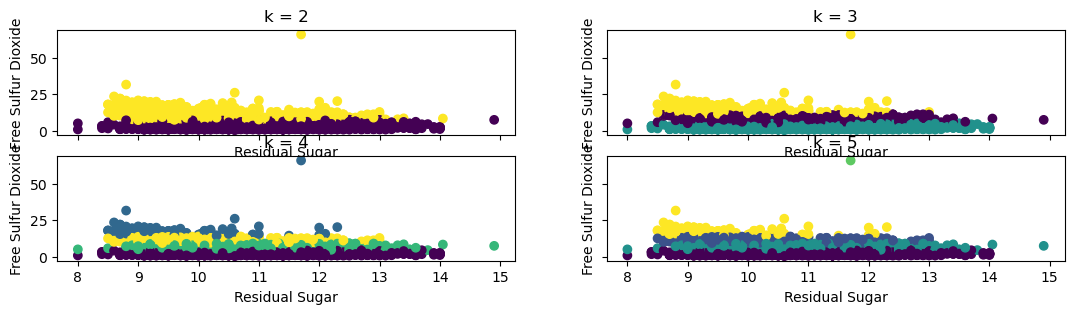

In [26]:
new_train = get_lit(train, 'alcohol', 'residual_sugar', 'density')

<Figure size 1400x900 with 0 Axes>

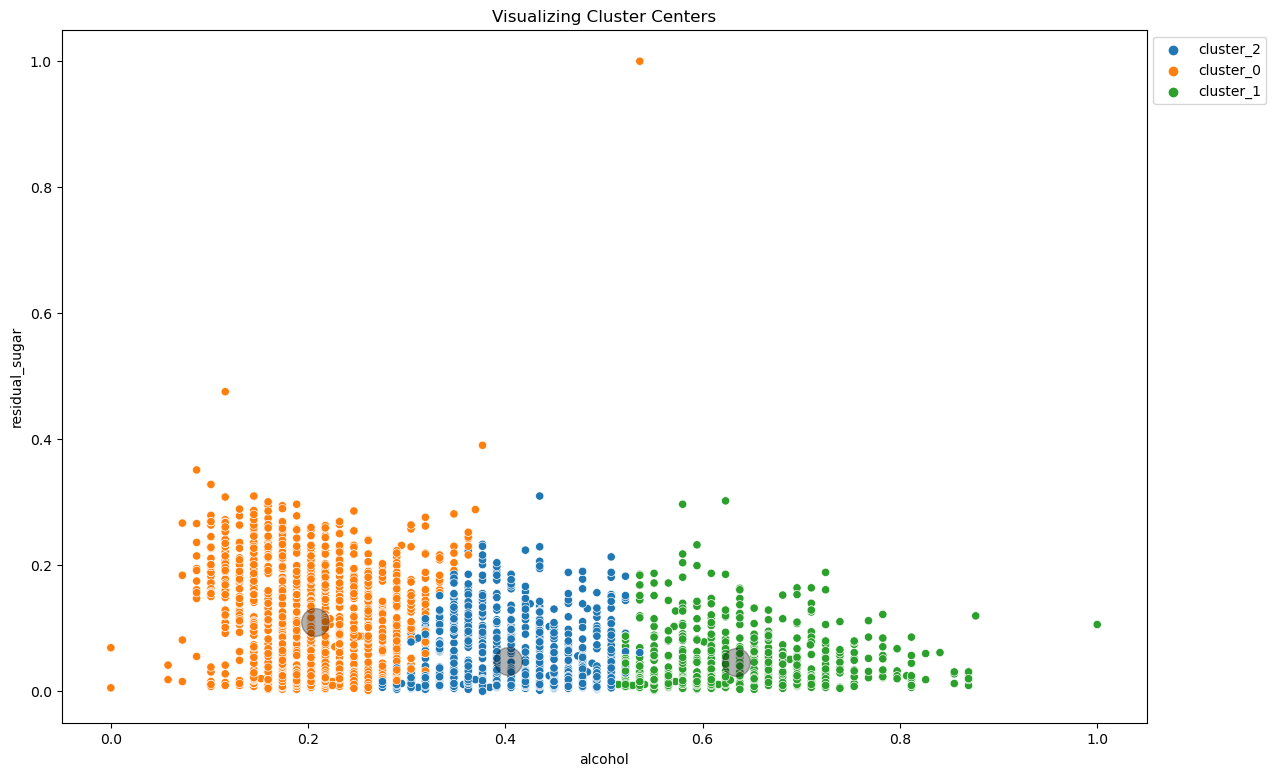

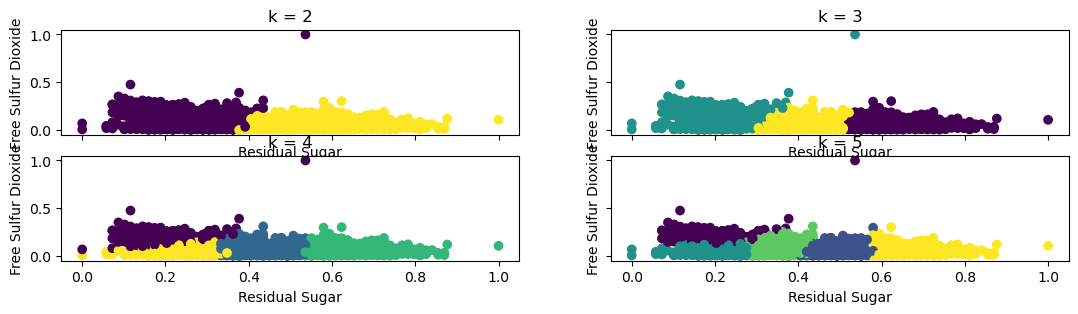

In [27]:
new_train = get_lit(X_train_scaled, 'alcohol', 'residual_sugar', 'density')

In [140]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353            6.4             0.160         0.28             2.2      0.042   
2032            7.2             0.550         0.09             1.5      0.108   
6223            6.4             0.400         0.25             4.2      0.032   
2817            7.2             0.260         0.44             7.1      0.027   
1293            7.5             0.755         0.00             1.9      0.084   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
3353                0.033                 0.093  0.99140  3.31       0.43   
2032                0.016                 0.151  0.99380  3.07       0.57   
6223                0.015                 0.091  0.98988  3.26       0.52   
2817                0.025                 0.126  0.99300  3.02       0.34   
1293                0.006                 0.012  0.99672  3.34       0.49   

      alcohol  quality wine_type  white    cluster  
3353     11.1        6     white      1  cluster_0  
2032      9.2        4     white      1  cluster_0  
6223     13.1        6     white      1  cluster_0  
2817     11.1        8     white      1  cluster_2  
1293      9.7        4       red      0  cluster_0

<Figure size 1400x900 with 0 Axes>

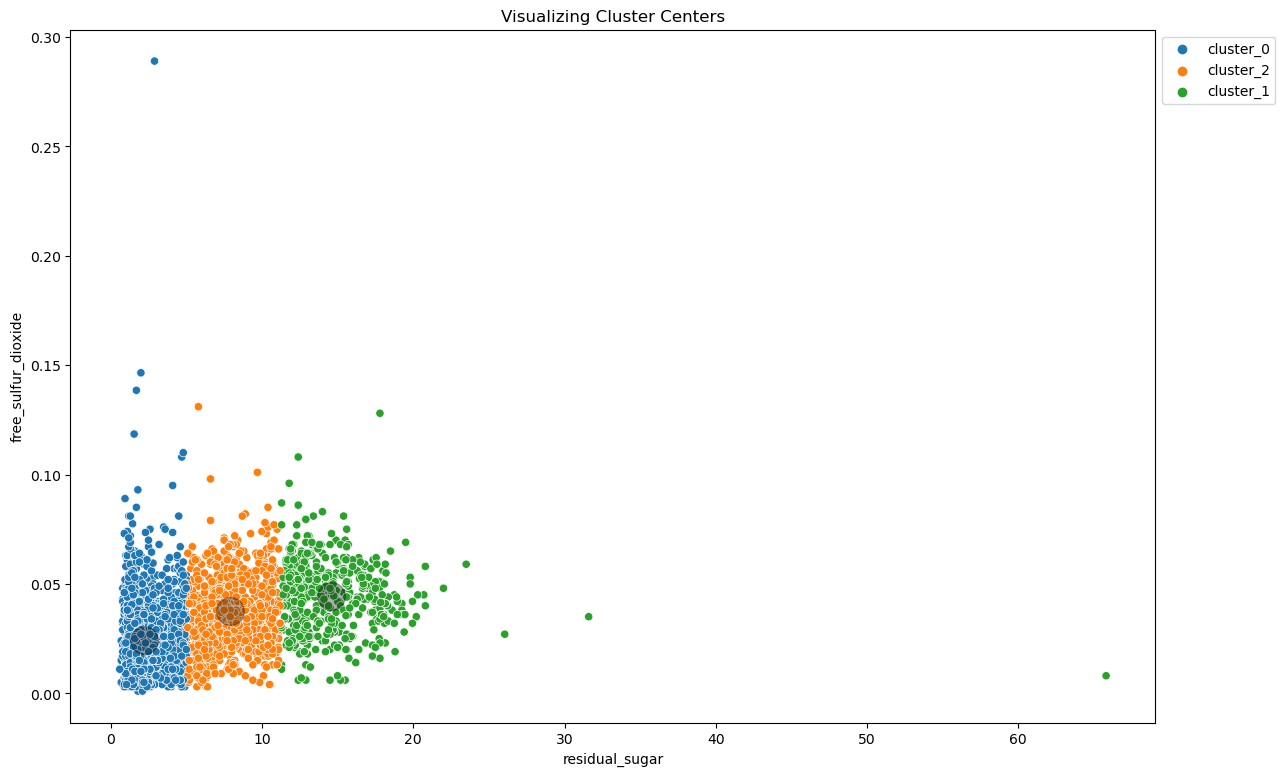

In [136]:
plt.figure(figsize=(14,9))
plt.figure(figsize=(14,9))

sns.scatterplot(x='residual_sugar', y='free_sulfur_dioxide', data=train, hue='cluster')

centroids.plot.scatter(x='residual_sugar', y='free_sulfur_dioxide', ax= plt.gca(), color='k', alpha = 0.3, s=400)

plt.title('Visualizing Cluster Centers')

unique_clusters = train['cluster'].unique()

cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1,1), loc='upper left')

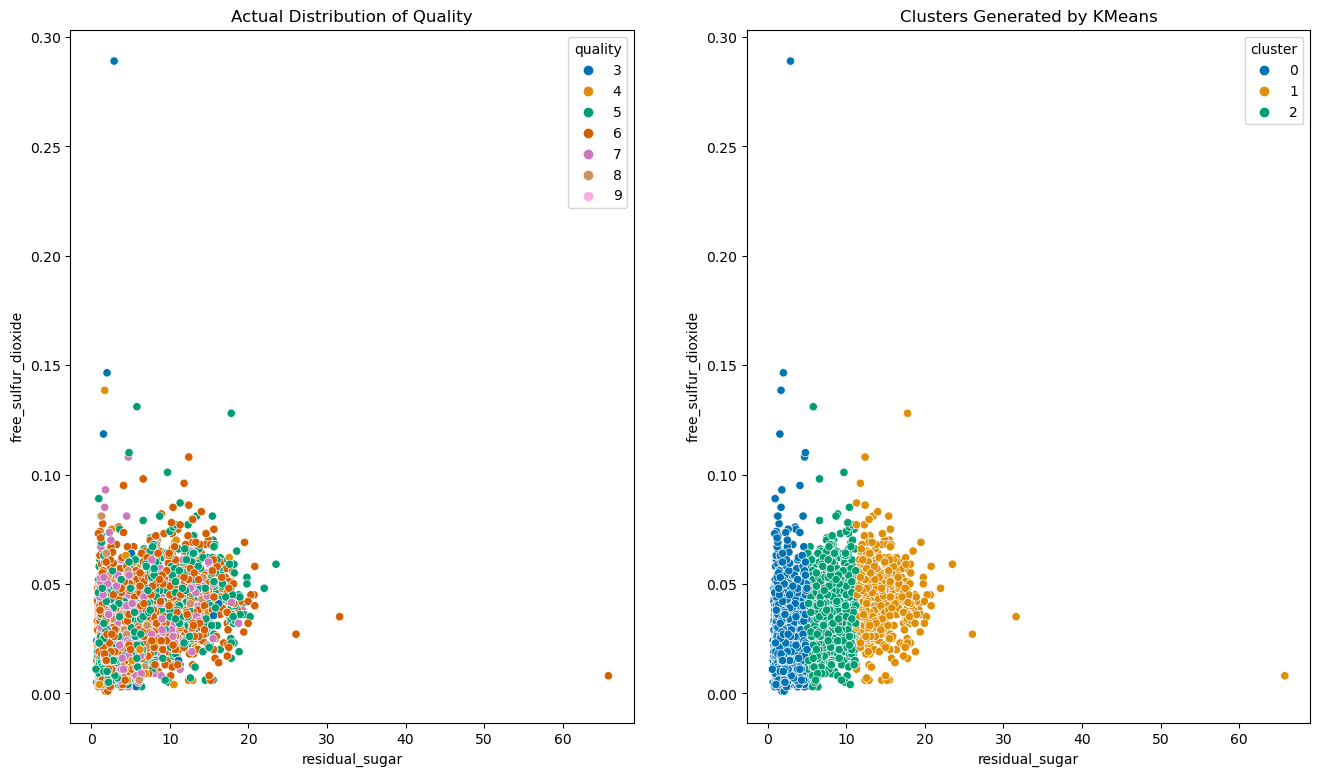

In [121]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='residual_sugar', y='free_sulfur_dioxide', hue='quality', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Quality")

sns.scatterplot(ax=axes[1], x='residual_sugar', y='free_sulfur_dioxide', hue='cluster', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

In [20]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[1684.6843217124292,
 813.3564432606312,
 531.0466069104818,
 411.8054119658668,
 318.78975949747615,
 260.7700877616214,
 225.16220070645164,
 196.87097414606433,
 177.43610823389415]

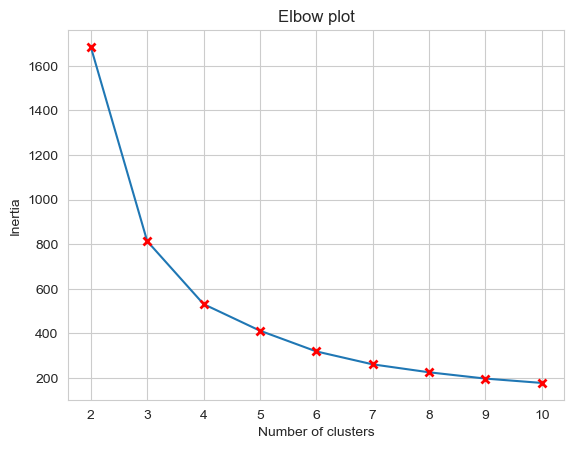

In [21]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,11), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

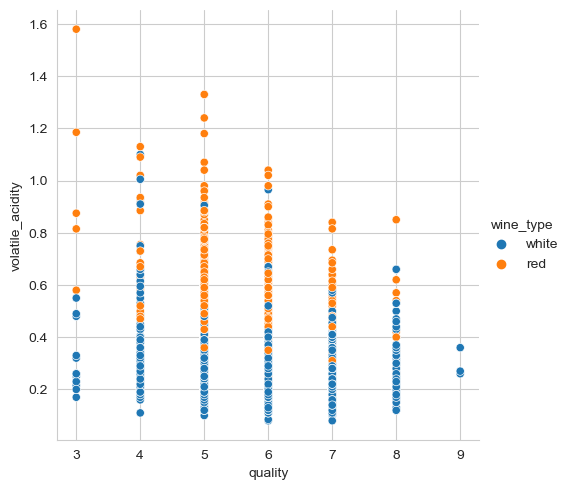

In [39]:
sns.relplot(data=train, x='quality', y='volatile_acidity', hue='wine_type')
plt.show()

In [40]:
X = train[['volatile_acidity', 'density']]

In [41]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X)

# USE the thing
kmeans.predict(X)

array([1, 0, 2, ..., 2, 1, 2], dtype=int32)

In [42]:
train['cluster2'] = kmeans.predict(X)

In [43]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353            6.4              0.16         0.28             2.2      0.042   
2032            7.2              0.55         0.09             1.5      0.108   
6223            6.4              0.40         0.25             4.2      0.032   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
3353                0.033                 0.093  0.99140  3.31       0.43   
2032                0.016                 0.151  0.99380  3.07       0.57   
6223                0.015                 0.091  0.98988  3.26       0.52   

      alcohol  quality wine_type  white  cluster  cluster2  
3353     11.1        6     white      1        2         1  
2032      9.2        4     white      1        1         0  
6223     13.1        6     white      1        0         2

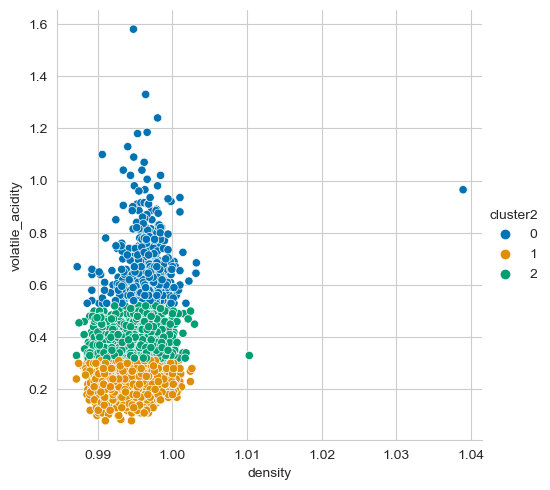

In [45]:
#Plot my predictions
sns.relplot(x='density', y='volatile_acidity', hue='cluster2', palette='colorblind', data=train)
plt.show()

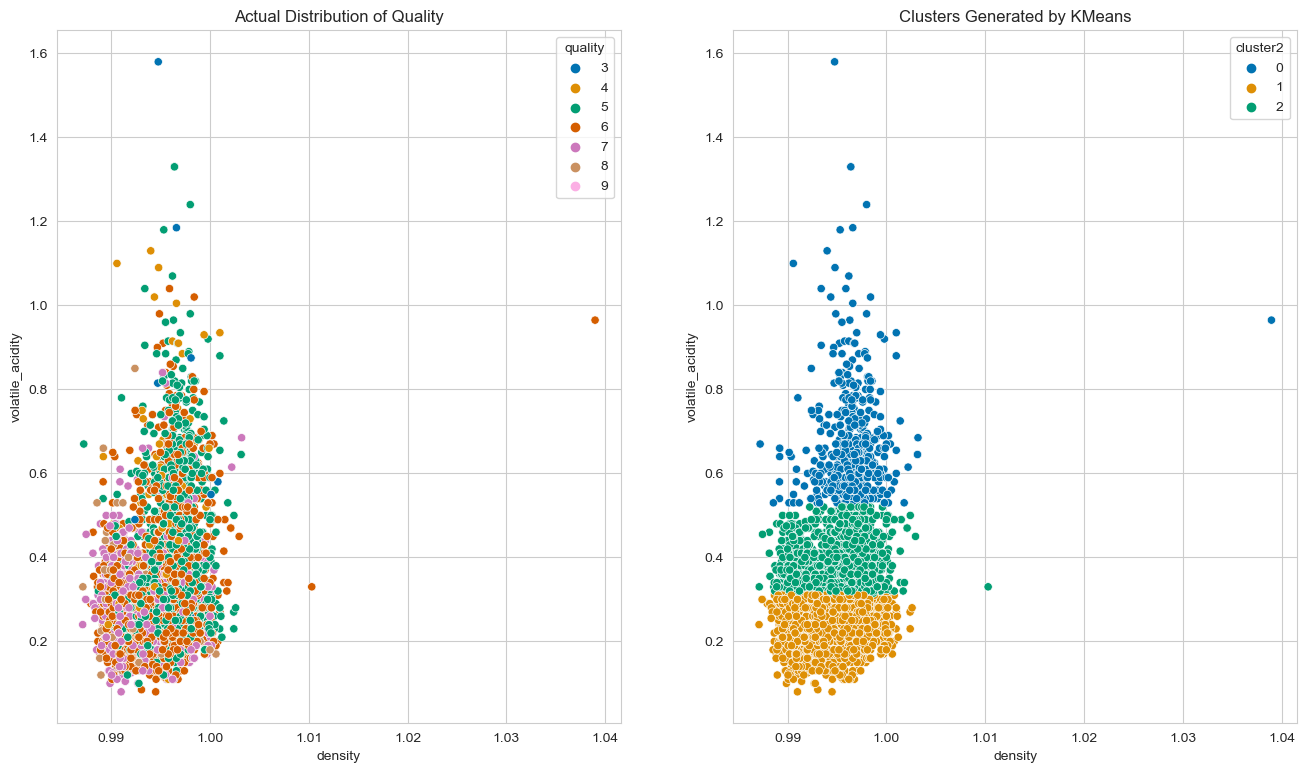

In [47]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='density', y='volatile_acidity', hue='quality', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Quality")

sns.scatterplot(ax=axes[1], x='density', y='volatile_acidity', hue='cluster2', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

In [48]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[32.91000582658457,
 18.24614214320671,
 11.9014156475453,
 7.834438906186074,
 5.909300272632789,
 4.385170408547259,
 3.4769632455924295,
 2.811149777474337,
 2.282876913966593]

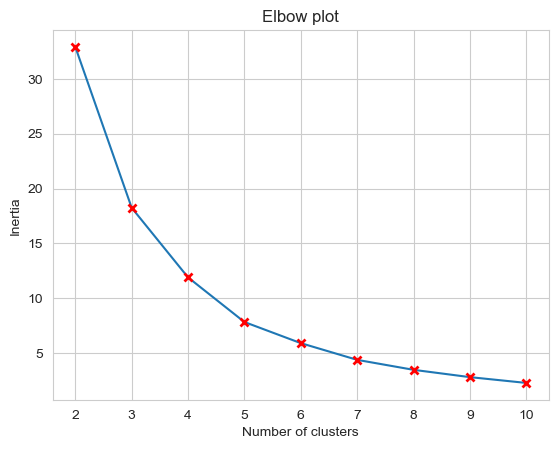

In [49]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,11), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

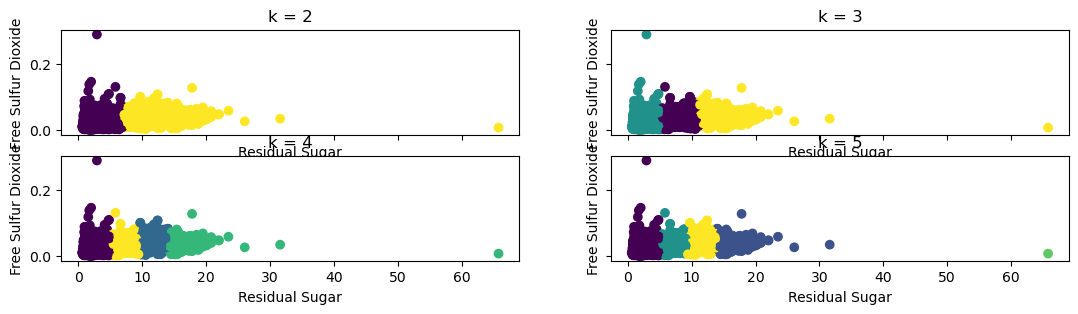

In [138]:
fig, axs = plt.subplots(2,2, figsize=(13,3), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2,6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.residual_sugar, X.free_sulfur_dioxide, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='Residual Sugar', ylabel='Free Sulfur Dioxide')

In [50]:
X = train[['volatile_acidity', 'fixed_acidity']]

In [65]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X)

# USE the thing
kmeans.predict(X)

array([0, 2, 0, ..., 2, 2, 1], dtype=int32)

In [66]:
train['cluster3'] = kmeans.predict(X)

In [67]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3353            6.4              0.16         0.28             2.2      0.042   
2032            7.2              0.55         0.09             1.5      0.108   
6223            6.4              0.40         0.25             4.2      0.032   

      free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
3353                0.033                 0.093  0.99140  3.31       0.43   
2032                0.016                 0.151  0.99380  3.07       0.57   
6223                0.015                 0.091  0.98988  3.26       0.52   

      alcohol  quality wine_type  white  cluster  cluster2  cluster3  
3353     11.1        6     white      1        2         1         0  
2032      9.2        4     white      1        1         0         2  
6223     13.1        6     white      1        0         2         0

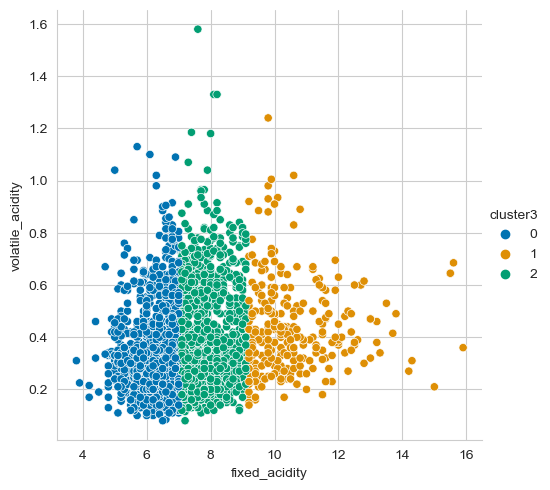

In [68]:
#Plot my predictions
sns.relplot(x='fixed_acidity', y='volatile_acidity', hue='cluster3', palette='colorblind', data=train)
plt.show()

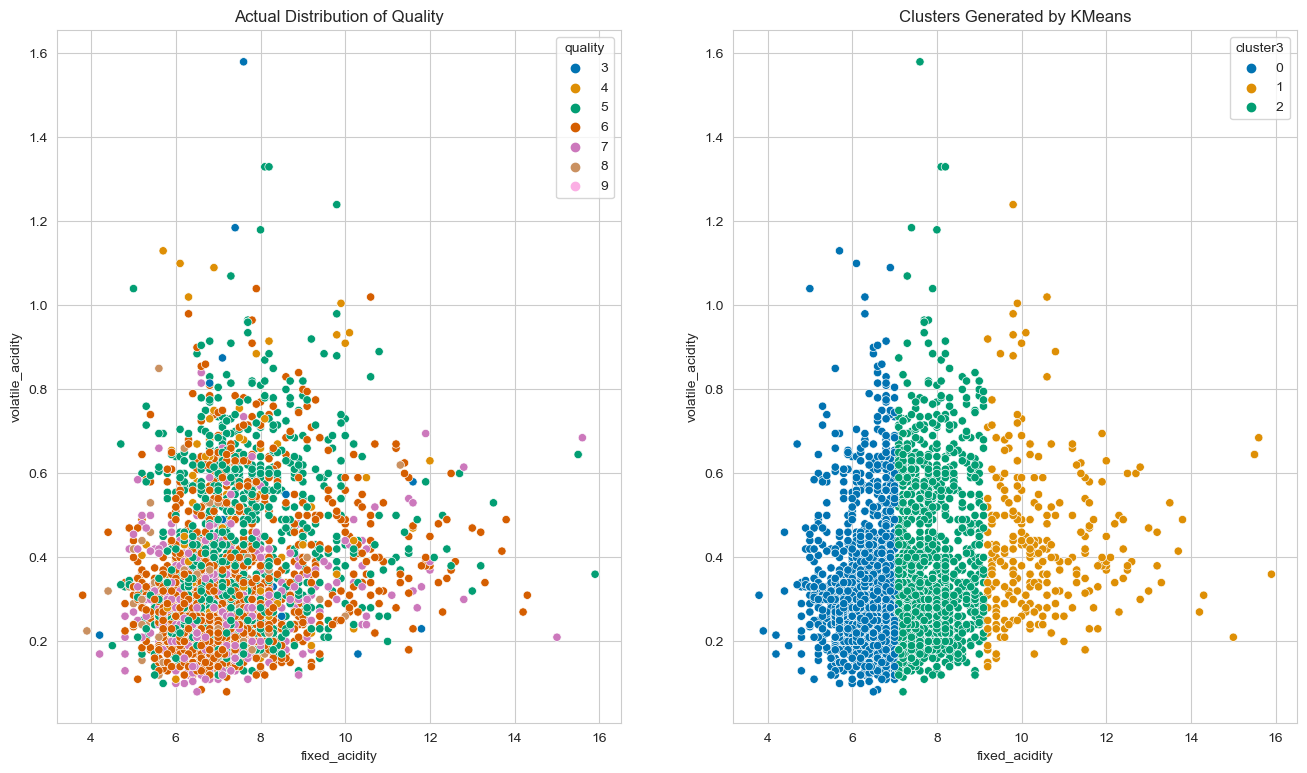

In [69]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='fixed_acidity', y='volatile_acidity', hue='quality', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Quality")

sns.scatterplot(ax=axes[1], x='fixed_acidity', y='volatile_acidity', hue='cluster3', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

In [70]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[2788.5445663326554,
 1535.0701920136419,
 1000.866422076702,
 722.7349653572911,
 548.4242638187156,
 443.8464896716248,
 372.56555642543094,
 306.8953318695979,
 269.6480261124014]

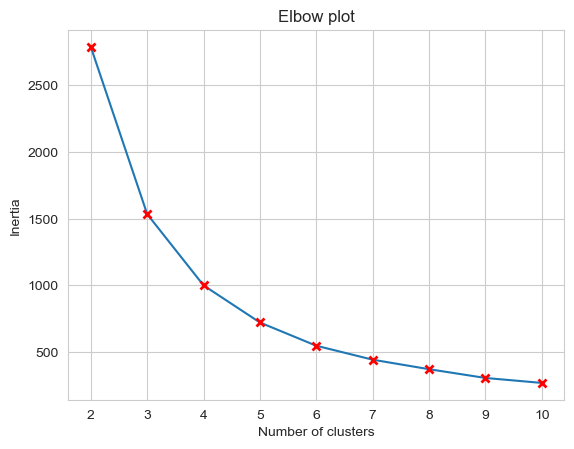

In [71]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,11), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()